# Installs

In [4]:
import sys
# !{sys.executable} -m pip install --upgrade pip
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128
# !pip install matplotlib
# !pip install tqdm

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

from torch.optim.lr_scheduler import ReduceLROnPlateau as Sheduler
torch.manual_seed(1337)

from src.datasets import MNISTDataset
from src.model import MyNN, MyModel
from src.utils import EarlyStopping

plt.style.use('dark_background')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Initializing Dataset

Datasets initialized. len = 70000
class_0 => 0
class_1 => 1
class_2 => 2
class_3 => 3
class_4 => 4
class_5 => 5
class_6 => 6
class_7 => 7
class_8 => 8
class_9 => 9

img[41843] : class_5


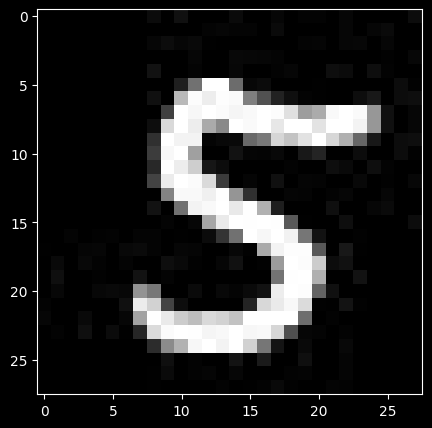

In [6]:
dataset_class = MNISTDataset('MNIST/dataset')
print(f'Datasets initialized. len = {len(dataset_class)}')

for cls, oh in dataset_class.classes_to_idx.items():
    print(f"\033[32m{cls}\033[0m => \033[34m{oh}\033[0m")

rand_i = np.random.randint(0, len(dataset_class))
img, cls = dataset_class.view(rand_i)
print(f'\nimg[{rand_i}] : {cls}')
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.show()

# Initializing Models

In [ ]:
model = MyNN(in_channels=1, output=10, activator='relu', input_size=(28, 28))
opt = torch.optim.Adam(model.parameters(), lr=0.001)
sheduler = Sheduler(opt, mode='min', factor=0.1, patience=5, threshold=0.0001)
earlystoper = EarlyStopping(mode='min', patience=10, threshold=0.0001, threshold_mode='rel')

classsificator = MyModel(
    dataset=dataset_class,
    model=model,
    optimizer=opt,
    loss_function=nn.CrossEntropyLoss(),
    sheduler=sheduler,
    earlystoper=earlystoper,
    save_path='models',
    name='class',
    device=device,
    )

# Train

Epoch 1/20, train [loss: 0.1655 | acc: 0.9498], val [loss: 0.0694 | acc: 0.9801], lr=0.0010


Epoch 2/20, train [loss: 0.0794 | acc: 0.9766], val [loss: 0.0590 | acc: 0.9824], lr=0.0010
Model seved on 2 as models\class_ckpt_epoch_2.pt


Epoch 3/20, train [loss: 0.0572 | acc: 0.9821], val [loss: 0.0580 | acc: 0.9838], lr=0.0010
Model seved on 3 as models\class_ckpt_epoch_3.pt


Epoch 4/20, train [loss: 0.0467 | acc: 0.9858], val [loss: 0.0329 | acc: 0.9905], lr=0.0010
Model seved on 4 as models\class_ckpt_epoch_4.pt


Epoch 5/20, train [loss: 0.0383 | acc: 0.9882], val [loss: 0.0405 | acc: 0.9895], lr=0.0010


Epoch 6/20, train [loss: 0.0311 | acc: 0.9903], val [loss: 0.0331 | acc: 0.9916], lr=0.0010


Epoch 7/20, train [loss: 0.0271 | acc: 0.9919], val [loss: 0.0362 | acc: 0.9900], lr=0.0010


Epoch 8/20, train [loss: 0.0239 | acc: 0.9923], val [loss: 0.0335 | acc: 0.9911], lr=0.0010


Epoch 9/20, train [loss: 0.0214 | acc: 0.9930], val [loss: 0.0303 | acc: 0.9920], lr=0.0010
Model seved on 9 as models\class_ckpt_epoch_9.pt


Epoch 10/20, train [loss: 0.0187 | acc: 0.9939], val [loss: 0.0313 | acc: 0.9926], lr=0.0010


Epoch 11/20, train [loss: 0.0172 | acc: 0.9942], val [loss: 0.0385 | acc: 0.9905], lr=0.0010


Epoch 12/20, train [loss: 0.0159 | acc: 0.9951], val [loss: 0.0391 | acc: 0.9919], lr=0.0010


Epoch 13/20, train [loss: 0.0126 | acc: 0.9959], val [loss: 0.0374 | acc: 0.9923], lr=0.0010


Epoch 14/20, train [loss: 0.0139 | acc: 0.9952], val [loss: 0.0448 | acc: 0.9913], lr=0.0010


Epoch 15/20, train [loss: 0.0121 | acc: 0.9958], val [loss: 0.0450 | acc: 0.9911], lr=0.0001


Epoch 16/20, train [loss: 0.0067 | acc: 0.9977], val [loss: 0.0404 | acc: 0.9929], lr=0.0001


Epoch 17/20, train [loss: 0.0041 | acc: 0.9987], val [loss: 0.0385 | acc: 0.9933], lr=0.0001


Epoch 18/20, train [loss: 0.0034 | acc: 0.9989], val [loss: 0.0396 | acc: 0.9932], lr=0.0001


Epoch 19/20, train [loss: 0.0026 | acc: 0.9991], val [loss: 0.0415 | acc: 0.9929], lr=0.0001
The model has reached a performance plateau and is no longer learning. Stopping training


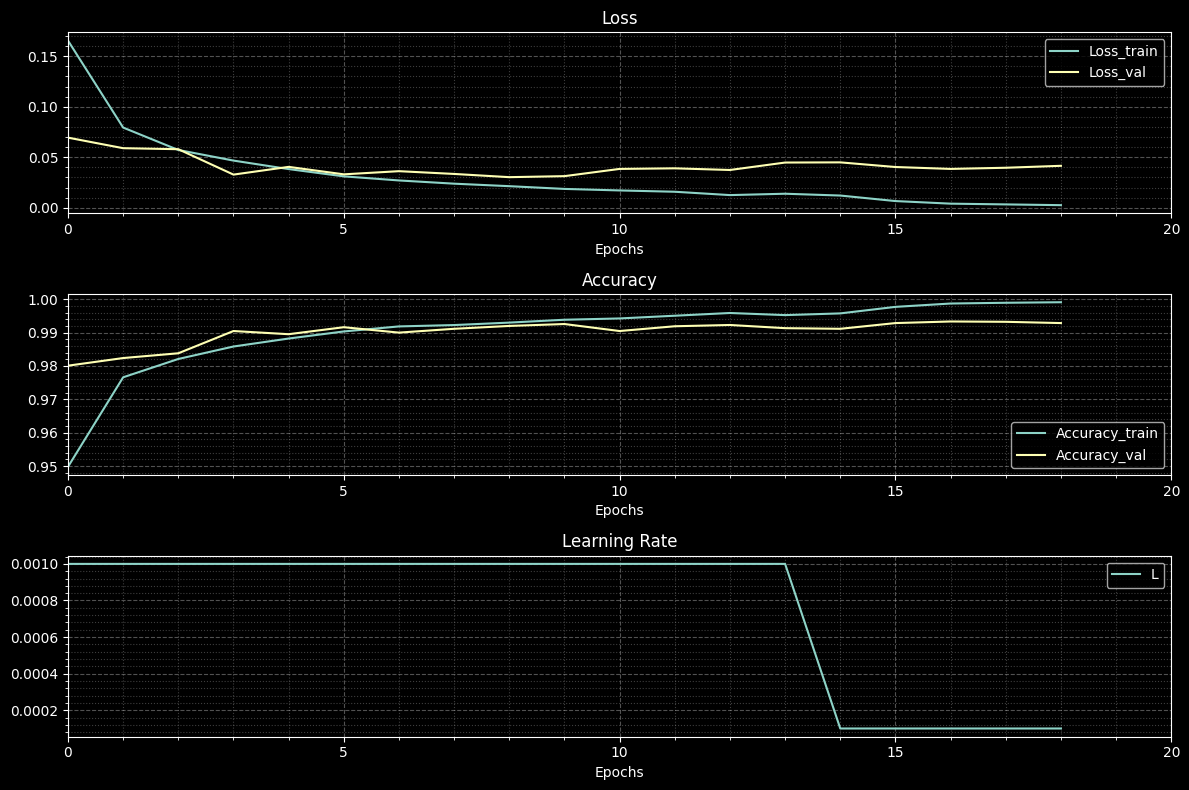

In [ ]:
classsificator(20)

# Тест

In [ ]:
# classsificator.load_model('models\\class_ckpt_epoch_9.pt')
print(f'Classificartion model test')
test_acc, test_loss = classsificator.test()

Classificartion model test


Mean Loss: 0.0398
Accuracy: 0.9921


# Inference


True: class_7
Predict: class_7


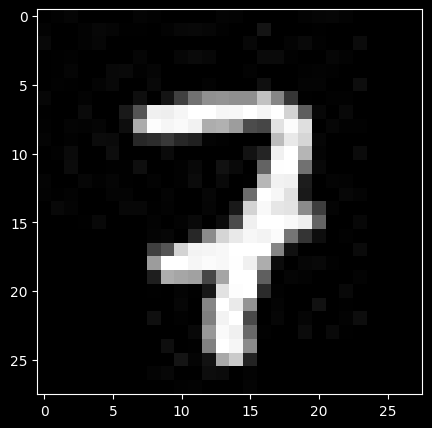

In [ ]:
rand_i = np.random.randint(0, len(dataset_class))
pred = classsificator.inference(dataset_class[rand_i][0])
img, true_ans = dataset_class.view(rand_i)

print(f'True: {true_ans}')
print(f'Predict: {pred}')

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.show()